In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

df = pd.merge(city_data, ride_data, how="left", on=["city"])
# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#city_data.head()

In [3]:
#ride_data.head()

In [4]:
# Obtain the x coordinates for each of the three city types

by_city_count = df.groupby(["city"]).count()
x = by_city_count["driver_count"] 
x.head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: driver_count, dtype: int64

In [5]:
# Obtain the y coordinates for each of the three city types
by_city_sum = df.groupby(["city"]).sum()
y = by_city_sum["fare"] / x
y.head()

city
Amandaburgh      24.641667
Barajasview      25.332273
Barronchester    36.422500
Bethanyland      32.956111
Bradshawfurt     40.064000
dtype: float64

In [6]:
by_city_mean = df.groupby(["city"]).mean()
z = by_city_mean["driver_count"]

In [7]:
by_city_sort = df.groupby(["city"]).first()
v = by_city_sort["type"]

In [8]:
# Build the scatter plots for each city types
new_df = pd.DataFrame({
    "Total Number of Rides (Per City)": x,
    "Average Fare ($)": y,
    "Driver Count Per City": z,
    "City Type": v
})

new_df.head()


,Total Number of Rides (Per City),Average Fare ($),Driver Count Per City,City Type
city,,,,
Amandaburgh,18,24.641667,12.0,Urban
Barajasview,22,25.332273,26.0,Urban
Barronchester,16,36.422500,11.0,Suburban
Bethanyland,18,32.956111,22.0,Suburban
Bradshawfurt,10,40.064000,7.0,Rural


In [9]:
new_df['Color'] = new_df['City Type']
new_df.head()

,Total Number of Rides (Per City),Average Fare ($),Driver Count Per City,City Type,Color
city,,,,,
Amandaburgh,18,24.641667,12.0,Urban,Urban
Barajasview,22,25.332273,26.0,Urban,Urban
Barronchester,16,36.422500,11.0,Suburban,Suburban
Bethanyland,18,32.956111,22.0,Suburban,Suburban
Bradshawfurt,10,40.064000,7.0,Rural,Rural


In [10]:
new_df.loc[new_df['City Type'] == 'Urban', 'Color'] = 'Coral'
new_df.loc[new_df['City Type'] == 'Suburban', 'Color'] = 'SkyBlue'
new_df.loc[new_df['City Type'] == 'Rural', 'Color'] = 'Gold'
new_df.head()

,Total Number of Rides (Per City),Average Fare ($),Driver Count Per City,City Type,Color
city,,,,,
Amandaburgh,18,24.641667,12.0,Urban,Coral
Barajasview,22,25.332273,26.0,Urban,Coral
Barronchester,16,36.422500,11.0,Suburban,SkyBlue
Bethanyland,18,32.956111,22.0,Suburban,SkyBlue
Bradshawfurt,10,40.064000,7.0,Rural,Gold


In [11]:
w = new_df["Color"]
w

city
Amandaburgh               Coral
Barajasview               Coral
Barronchester           SkyBlue
Bethanyland             SkyBlue
Bradshawfurt               Gold
Brandonfort             SkyBlue
Carriemouth               Coral
Christopherfurt           Coral
Colemanland             SkyBlue
Davidfurt               SkyBlue
Deanville                 Coral
East Aaronbury          SkyBlue
East Danielview         SkyBlue
East Kaylahaven           Coral
East Kentstad           SkyBlue
East Marymouth          SkyBlue
Erikaland                 Coral
Garzaport                  Gold
Grahamburgh               Coral
Grayville               SkyBlue
Harringtonfort             Gold
Huntermouth               Coral
Hurleymouth               Coral
Jerryton                  Coral
Jessicaport                Gold
Johnton                   Coral
Joneschester              Coral
Josephside              SkyBlue
Justinberg                Coral
Karenberg                 Coral
                         ...   
Sou

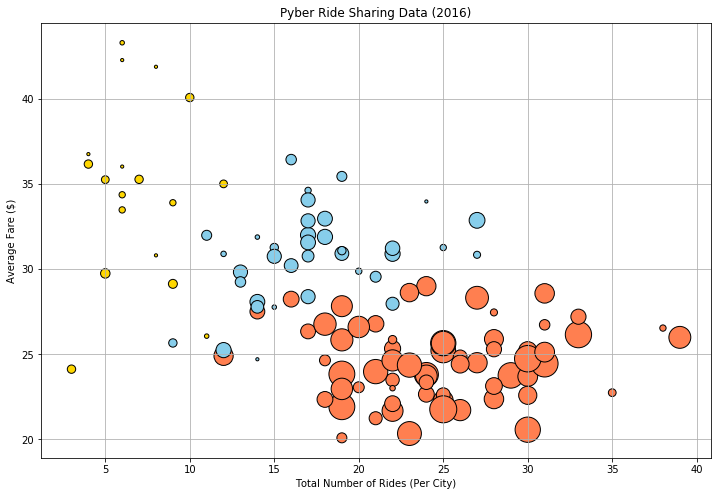

In [12]:
new_df.plot(kind = "scatter", x = "Total Number of Rides (Per City)", y = "Average Fare ($)", grid = True, figsize = (12,8),
              title = "Pyber Ride Sharing Data (2016)", c = w, edgecolors = "black", s = z*10)
plt.show()


# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure